# Introduction

In this problem set, you'll implement two versions of a wordgame! This game is a lot like Scrabble or Words With Friends,if you've played those. Letters are dealt to players, who then construct one or more words out of their letters.Each valid word receives a score, based on the length of the word and the letters in that word. 

The rules of the game are as follows:

Dealing

    - A player is dealt a hand of n letters chosen at random (assume n=7 for now).

    - The player arranges the hand into as many words as they want out of the letters, using each letter at most once.

    - Some letters may remain unused (these won't be scored).

Scoring
    - The score for the hand is the sum of the scores for each word formed.

    - The score for a word is the sum of the points for letters in the word, multiplied by the length of the word, plus 50 points if all n letters are used on the first word created.

    - Letters are scored as in Scrabble; A is worth 1, B is worth 3,C is worth 3, D is worth 2, E is worth 1, and so on. We have defined the dictionary SCRABBLE_LETTER_VALUES that maps each lowercase letter to its Scrabble letter value.

    - For example, 'weed' would be worth 32 points ((4+1+1+2) for the four letters, then multiply by len('weed') to get (4+1+1+2)*4 = 32). Be sure to check that the hand actually has 1 'w', 2 'e's, and 1 'd' before scoring the word!

    - As another example, if n=7 and you make the word 'waybill' on the first try, it would be worth 155 points (the base score for 'waybill' is (4+1+4+3+1+1+1)*7=105, plus an additional 50 point bonus for using all n letters).



### Sample Output

In [ ]:
"""
Loading word list from file...
   83667 words loaded.
Enter n to deal a new hand, r to replay the last hand, or e to end game: n
Current Hand: p z u t t t o
Enter word, or a "." to indicate that you are finished: tot
"tot" earned 9 points. Total: 9 points
Current Hand: p z u t
Enter word, or a "." to indicate that you are finished: .
Total score: 9 points.

Enter n to deal a new hand, r to replay the last hand, or e to end game: r
Current Hand: p z u t t t o
Enter word, or a "." to indicate that you are finished: top
"top" earned 15 points. Total: 15 points
Current Hand: z u t t
Enter word, or a "." to indicate that you are finished: tu
Invalid word, please try again.
Current Hand: z u t t
Enter word, or a "." to indicate that you are finished: .
Total score: 15 points.

Enter n to deal a new hand, r to replay the last hand, or e to end game: n
Current Hand: a q w f f i p
Enter word, or a "." to indicate that you are finished: paw
"paw" earned 24 points. Total: 24 points
Current Hand: q f f i
Enter word, or a "." to indicate that you are finished: qi
"qi" earned 22 points. Total: 46 points
Current Hand: f f
Enter word, or a "." to indicate that you are finished: .
Total score: 46 points.

Enter n to deal a new hand, r to replay the last hand, or e to end game: n
Current Hand: a r e t i i n
Enter word, or a "." to indicate that you are finished: inertia
"inertia" earned 99 points. Total: 99 points
Run out of letters. Total score: 99 points.

Enter n to deal a new hand, r to replay the last hand, or e to end game: e

"""

### Getting Started
1.Download and save week140606, a zip file of all the skeleton code you'll be filling in. Extract the files from the zip folder and make sure to save all the files ps4a.py, ps4b.py, test_ps4a.py and words.txt in the same folder. We recommend creating a folder in your Documents folder called week14, and inside the week14 folder, creating a separate folder for it. If you don't follow this instruction, you may end up with issues because the files for this problem set depend on one another.

2.Run the file ps4a.py, without making any modifications to it, in order to ensure that everything is set up correctly.The code we have given you loads a list of valid words from a file and then calls the playGame function.You will implement the functions it needs in order to work. If everything is okay, after a small delay, you should see the following printed out:

Loading word list from file...

      83667 words loaded.

playGame not yet implemented.

If you see an IOError instead (e.g., "No such file or directory"), you should change the value of the WORDLIST_FILENAME constant (defined near the top of the file) to the complete pathname for the file words.txt (This will vary based on where you saved the files).

For example, if you saved all the files including this words.txt in the directory "C:/Users/Ana/6001x/PS4" change the line: 

WORDLIST_FILENAME = "words.txt"  to something like

WORDLIST_FILENAME = "C:/Users/Ana/6001x/PS4/words.txt" 

Windows users, if you are copying the file path from Windows Explorer, you will have to change the backslashes to forward slashes.

3.The file ps4a.py has a number of already implemented functions you can use while writing up your solution. You can ignore the code between the following comments, though you should read and understand how to use each helper function by reading the docstrings:

#-----------------------------------
#Helper code
#You don't need to understand this helper code,
#but you will have to know how to use the functions
#(so be sure to read the docstrings!)
    .
    .
    .
#(end of helper code)
#----------------------------------- 

4.This problem set is structured so that you will write a number of modular functions and then glue them together to form the complete word playing game. Instead of waiting until the entire game is ready, you should test each function you write,individually, before moving on. This approach is known as unit testing, and it will help you debug your code.

We have provided several test functions to get you started. After you've written each new function, unit test by running the file test_ps4a.py to check your work.

If your code passes the unit tests you will see a SUCCESS message; otherwise you will see a FAILURE message. These tests aren't exhaustive. You will want to test your code in other ways too.

Try running test_ps4a.py now (before you modify the ps4a.py skeleton). 
You should see that all the tests fail, because nothing has been implemented yet.

These are the provided test functions:

test_getWordScore()

    Test the getWordScore() implementation.

test_updateHand()

    Test the updateHand() implementation.

test_isValidWord()
    
    Test the isValidWord() implementation.

In [1]:
import random
import string

VOWELS = 'aeiou'
CONSONANTS = 'bcdfghjklmnpqrstvwxyz'
HAND_SIZE = 7

SCRABBLE_LETTER_VALUES = {
    'a': 1, 'b': 3, 'c': 3, 'd': 2, 'e': 1, 'f': 4, 'g': 2, 'h': 4, 'i': 1, 'j': 8, 'k': 5, 'l': 1, 'm': 3, 'n': 1, 'o': 1, 'p': 3, 'q': 10, 'r': 1, 's': 1, 't': 1, 'u': 1, 'v': 4, 'w': 4, 'x': 8, 'y': 4, 'z': 10
}

# -----------------------------------
# Helper code
# (you don't need to understand this helper code)

WORDLIST_FILENAME = "words.txt"

def loadWords():
    """
    Returns a list of valid words. Words are strings of lowercase letters.
    
    Depending on the size of the word list, this function may
    take a while to finish.
    """
    print("Loading word list from file...")
    # inFile: file
    inFile = open(WORDLIST_FILENAME, 'r')
    # wordList: list of strings
    wordList = []
    for line in inFile:
        wordList.append(line.strip().lower())
    print("  ", len(wordList), "words loaded.")
    return wordList

def getFrequencyDict(sequence):
    """
    Returns a dictionary where the keys are elements of the sequence
    and the values are integer counts, for the number of times that
    an element is repeated in the sequence.

    sequence: string or list
    return: dictionary
    """
    # freqs: dictionary (element_type -> int)
    freq = {}
    for x in sequence:
        freq[x] = freq.get(x,0) + 1
    return freq
	

# (end of helper code)
# -----------------------------------


<font color=#ff00ff size=5 face="黑体"> Problem 1 - Word Scores</font>

The first step is to implement some code that allows us to calculate the score for a single word. The function getWordScore should accept as input a string of lowercase letters (a word) and return the integer score for that word, using the game's scoring rules. 

### Hints

1. You may assume that the input word is always either a string of lowercase letters, or the empty string "".

2. You will want to use the SCRABBLE_LETTER_VALUES dictionary defined at the top of ps4a.py. You should not change its value.

3. Do not assume that there are always 7 letters in a hand!  The parameter n is the number of letters required for a bonus score (the maximum number of letters in the hand). Our goal is to keep the code modular - if you want to try playing your word game with n=10 or n=4, you will be able to do it by simply changing the value of HAND_SIZE!

4. Testing: If this function is implemented properly, and you run test_ps4a.py, you should see that the test_getWordScore() tests pass. Also test your implementation of getWordScore, using some reasonable English words.

In [2]:
def getWordScore(word, n):
    """
    Returns the score for a word. Assumes the word is a valid word.

    The score for a word is the sum of the points for letters in the
    word, multiplied by the length of the word, PLUS 50 points if all n
    letters are used on the first turn.

    Letters are scored as in Scrabble; A is worth 1, B is worth 3, C is
    worth 3, D is worth 2, E is worth 1, and so on (see SCRABBLE_LETTER_VALUES)

    word: string (lowercase letters)
    n: integer (HAND_SIZE; i.e., hand size required for additional points)
    returns: int >= 0
    """
    score = 0
    for letter in word:
        score += SCRABBLE_LETTER_VALUES[letter]
    score = len(word) * score
    if len(word) == n:      
        return score+50
    return score
    
    
    

<font color=#ff00ff size=5 face="黑体"> Problem 2 - Dealing with Hands</font>

**Please read this problem entirely!!**  The majority of this problem consists of learning how to read code, which is an incredibly useful and important skill. At the end, you will implement a short function. Be sure to take your time on this problem - it may seem easy, but reading someone else's code can be challenging and this is an important exercise.

### Representing hands

A hand is the set of letters held by a player during the game. The player is initially dealt a set of random letters. For example, the player could start out with the following hand:  a, q, l, m, u, i, l. In our program, a hand will be represented as a dictionary: 
the keys are (lowercase) letters and the values are the number of times the particular letter is repeated in that hand. For example, the above hand would be represented as:

$hand = \{'a':1, 'q':1, 'l':2, 'm':1, 'u':1, 'i':1\}$

Notice how the repeated letter 'l' is represented. Remember that with a dictionary, the usual way to access a value is hand['a'],where 'a' is the key we want to find.However, this only works if the key is in the dictionary; otherwise, we get a KeyError.To avoid this, we can use the call hand.get('a',0). This is the "safe" way to access a value if we are not sure the key is in the dictionary. d.get(key,default) returns the value for key if key is in the dictionary d, else default. If default is not given, it returns None, so that this method never raises a KeyError. For example:

In [ ]:
>>>hand['e']
Traceback (most recent call last):
  File "<stdin>", line 1, in <module>
KeyError: 'e'
>>>hand.get('e', 0)
0

In [16]:
hand = {'a':1, 'q':1, 'l':2, 'm':1, 'u':1, 'i':1}
print(hand.get('a',2))          #get使用方法测试
print(hand.get('l',2))
print(hand.get('l',1))
print(hand.get('l',0))
print(hand.get('c',7))

1
2
2
2
7


### Converting words into dictionary representation
One useful function we've defined for you is getFrequencyDict, defined near the top of ps4a.py. When given a string of letters as an input, it returns a dictionary where the keys are letters and the values are the number of times that letter is represented in the input string. For example:

In [ ]:
>>> getFrequencyDict("hello")
{'h': 1, 'e': 1, 'l': 2, 'o': 1}
As you can see, this is the same kind of dictionary we use to represent hands.

### Displaying a hand
Given a hand represented as a dictionary, we want to display it in a user-friendly way. We have provided the implementation for this in the displayHand function. Take a few minutes right now to read through this function carefully and understand what it does and how it works.

### Generating a random hand
The hand a player is dealt is a set of letters chosen at random. We provide you with the implementation of a function that generates this random hand, dealHand. The function takes as input a positive integer n, and returns a new object, a hand containing n lowercase letters. Again, take a few minutes (right now!) to read through this function carefully and understand what it does and how it works.

### Removing letters from a hand (you implement this)
The player starts with a hand, a set of letters. As the player spells out words, letters from this set are used up. For example, the player could start out with the following hand: a, q, l, m, u, i, l. The player could choose to spell the word quail.This would leave the following letters in the player's hand: l, m. Your task is to implement the function updateHand, which takes in two inputs - a hand and a word (string). 
updateHand uses letters from the hand to spell the word, and then returns a copy of the hand,containing only the letters remaining. For example:   

In [ ]:
>>> hand = {'a':1, 'q':1, 'l':2, 'm':1, 'u':1, 'i':1}
>>> displayHand(hand) # Implemented for you
a q l l m u i
>>> hand = updateHand(hand, 'quail') # You implement this function!
>>> hand
{'a':0, 'q':0, 'l':1, 'm':1, 'u':0, 'i':0}
>>> displayHand(hand)
l m  

Implement the updateHand function. Make sure this function has no side effects: i.e., it must not mutate the hand passed in. Before pasting your function definition here, be sure you've passed the appropriate tests in test_ps4a.py.

In [3]:
def displayHand(hand):
    """
    Displays the letters currently in the hand.

    For example:
    >>> displayHand({'a':1, 'x':2, 'l':3, 'e':1})
    Should print out something like:
       a x x l l l e
    The order of the letters is unimportant.

    hand: dictionary (string -> int)
    """
    for letter in hand.keys():
        for j in range(hand[letter]):
             print(letter,end=" ")       # print all on the same line
    print()      

In [4]:
def dealHand(n):
    """
    Returns a random hand containing n lowercase letters.
    At least n/3 the letters in the hand should be VOWELS.

    Hands are represented as dictionaries. The keys are
    letters and the values are the number of times the
    particular letter is repeated in that hand.

    n: int >= 0
    returns: dictionary (string -> int)
    """
    hand={}
    numVowels = n // 3
    
    for i in range(numVowels):
        x = VOWELS[random.randrange(0,len(VOWELS))]
        hand[x] = hand.get(x, 0) + 1      #这个方法非常好哎，一定要学习
        
    for i in range(numVowels, n):    
        x = CONSONANTS[random.randrange(0,len(CONSONANTS))]
        hand[x] = hand.get(x, 0) + 1
        
    return hand


In [5]:
def updateHand(hand, word):
    """
    Assumes that 'hand' has all the letters in word.
    In other words, this assumes that however many times
    a letter appears in 'word', 'hand' has at least as
    many of that letter in it. 

    Updates the hand: uses up the letters in the given word
    and returns the new hand, without those letters in it.

    Has no side effects: does not modify hand.

    word: string
    hand: dictionary (string -> int)    
    returns: dictionary (string -> int)
    """
    hand_new = hand.copy()
    for letter in word:
        hand_new[letter] = hand_new.get(letter, 0) - 1   #使用dealhand中的方法
    return  hand_new
    
    
    
    
    

<font color=#ff00ff size=5 face="黑体"> Problem 3 - Valid Words</font>

At this point, we have written code to generate a random hand and display that hand to the user. We can also ask the user for a word (Python's input) and score the word (using your getWordScore). However, at this point we have not written any code to verify that a word given by a player obeys the rules of the game. A valid word is in the word list; and it is composed entirely of letters from the current hand.Implement the isValidWord function.

### Testing: 
Make sure the test_isValidWord tests pass. In addition, you will want to test your implementation by calling it multiple times on the same hand - what should the correct behavior be? Additionally, the empty string ('') is not a valid word - if you code this function correctly, you shouldn't need an additional check for this condition.

Fill in the code for isValidWord in ps4a.py and be sure you've passed the appropriate tests in test_ps4a.py before pasting your function definition here.  

In [6]:
def isValidWord(word, hand, wordList):
    """
    Returns True if word is in the wordList and is entirely
    composed of letters in the hand. Otherwise, returns False.

    Does not mutate hand or wordList.
   
    word: string
    hand: dictionary (string -> int)
    wordList: list of lowercase strings
    """
    hand_tmp = hand.copy()
    for letter in word:
        if letter not in hand_tmp.keys():
            return False
        if hand_tmp[letter]<1:       #可用次数少于1
            return False
        else:
            hand_tmp[letter] -= 1    
    if word not  in wordList:
        return  False
    return True
    
    
    
    
    

<font color=#ff00ff size=5 face="黑体"> Problem 4 - Hand Length</font>

We are now ready to begin writing the code that interacts with the player. We'll be implementing the playHand function. This function allows the user to play out a single hand. First, though, you'll need to implement the helper calculateHandlen function, which can be done in under five lines of code.

In [7]:
def calculateHandlen(hand):
    """ 
    Returns the length (number of letters) in the current hand.
    
    hand: dictionary (string int)
    returns: integer
    """
    length = 0
    for value in hand.values():
        length += value
    return length

<font color=#ff00ff size=5 face="黑体"> Problem 5 - Playing a Hand</font>

In ps4a.py, note that in the function playHand, there is a bunch of pseudocode. 
This pseudocode is provided to help guide you in writing your function. 
Check out the Why Pseudocode? resource to learn more about the What and Why of Pseudocode before you start coding your solution.

Note: Do not assume that there will always be 7 letters in a hand! The parameter n represents the size of the hand.

Testing: Here is some example output of playHand:

### Case #1

### Function Call:

In [ ]:
wordList = loadWords()
playHand({'h':1, 'i':1, 'c':1, 'z':1, 'm':2, 'a':1}, wordList, 7)

### Output:

In [ ]:
"""
  Current Hand:  a c i h m m z
  Enter word, or a "." to indicate that you are finished: him
  "him" earned 24 points. Total: 24 points

  Current Hand:  a c m z
  Enter word, or a "." to indicate that you are finished: cam
  "cam" earned 21 points. Total: 45 points

  Current Hand:  z
  Enter word, or a "." to indicate that you are finished: .
  Goodbye! Total score: 45 points.
"""

### Case #2
### Function Call:

In [ ]:
wordList = loadWords()
playHand({'w':1, 's':1, 't':2, 'a':1, 'o':1, 'f':1}, wordList, 7)

### Output:

In [ ]:
"""
  Current Hand:  a s t t w f o
  Enter word, or a "." to indicate that you are finished: tow
  "tow" earned 18 points. Total: 18 points

  Current Hand:  a s t f
  Enter word, or a "." to indicate that you are finished: tasf
  Invalid word, please try again.

  Current Hand:  a s t f
  Enter word, or a "." to indicate that you are finished: fast
  "fast" earned 28 points. Total: 46 points

  Run out of letters. Total score: 46 points.
"""

### Case #3

### Function Call:

In [ ]:
wordList = loadWords()
playHand({'n':1, 'e':1, 't':1, 'a':1, 'r':1, 'i':2}, wordList, 7)

### Output:

In [ ]:
"""
  Current Hand: a r e t i i n
  Enter word, or a "." to indicate that you are finished: inertia
  "inertia" earned 99 points. Total: 99 points

  Run out of letters. Total score: 99 points.
"""

In [19]:
def playHand(hand, wordList, n):
    """
    Allows the user to play the given hand, as follows:

    * The hand is displayed.
    * The user may input a word or a single period (the string ".") 
      to indicate they're done playing
    * Invalid words are rejected, and a message is displayed asking
      the user to choose another word until they enter a valid word or "."
    * When a valid word is entered, it uses up letters from the hand.
    * After every valid word: the score for that word is displayed,
      the remaining letters in the hand are displayed, and the user
      is asked to input another word.
    * The sum of the word scores is displayed when the hand finishes.
    * The hand finishes when there are no more unused letters or the user
      inputs a "."

      hand: dictionary (string -> int)
      wordList: list of lowercase strings
      n: integer (HAND_SIZE; i.e., hand size required for additional points)
      
    """
    # BEGIN PSEUDOCODE (download ps4a.py to see)
    total_score = 0
    while calculateHandlen(hand) > 0:
        print("Current Hand: ",end = '')
        displayHand(hand)    ######添加提示
        user_input = str(input("Enter word, or a \".\" to indicate that you are finished:"))
        if user_input == ".":
            print("Goodbye! Total score: {0} points.".format(total_score))
            break
        else:
            if not isValidWord(user_input,hand,wordList):
                print("Invalid word, please try again.")
            else:
                total_score = total_score +getWordScore(user_input,n)
                print("\"{0}\" earned {1} points. Total: {2} points".format(user_input,getWordScore(user_input,n),total_score))
                hand = updateHand(hand,user_input)     #下面是不是缺一行，先搞一个print
                print()
                
    if calculateHandlen(hand) == 0:
        print("Run out of letters. Total score: {0} points.".format(total_score))
    
    
    
    
    

<font color=#ff00ff size=5 face="黑体"> Problem 6 - Playing a Game</font>

A game consists of playing multiple hands. We need to implement one final function to complete our word-game program. Write the code that implements the playGame function. 
You should remove the code that is currently uncommented in the playGame body. 
Read through the specification and make sure you understand what this function accomplishes. For the game, you should use the HAND_SIZE constant to determine the number of cards in a hand.

Testing: Try out this implementation as if you were playing the game. Try out different values for HAND_SIZE with your program, and be sure that you can play the wordgame with different hand sizes by modifying only the variable HAND_SIZE. 

here is how the game output should look like

In [28]:
"""
Loading word list from file...
   83667 words loaded.
Enter n to deal a new hand, r to replay the last hand, or e to end game: r
You have not played a hand yet. Please play a new hand first!

Enter n to deal a new hand, r to replay the last hand, or e to end game: n
Current Hand: p z u t t t o
Enter word, or a "." to indicate that you are finished: tot
"tot" earned 9 points. Total: 9 points

Current Hand: p z u t
Enter word, or a "." to indicate that you are finished: .
Goodbye! Total score: 9 points.

Enter n to deal a new hand, r to replay the last hand, or e to end game: r
Current Hand: p z u t t t o
Enter word, or a "." to indicate that you are finished: top
"top" earned 15 points. Total: 15 points

Current Hand: z u t t
Enter word, or a "." to indicate that you are finished: tu
Invalid word, please try again.

Current Hand: z u t t
Enter word, or a "." to indicate that you are finished: .
Goodbye! Total score: 15 points.

Enter n to deal a new hand, r to replay the last hand, or e to end game: n
Current Hand: a q w f f i p
Enter word, or a "." to indicate that you are finished: paw
"paw" earned 24 points. Total: 24 points

Current Hand: q f f i
Enter word, or a "." to indicate that you are finished: qi
"qi" earned 22 points. Total: 46 points

Current Hand: f f
Enter word, or a "." to indicate that you are finished: .
Goodbye! Total score: 46 points.

Enter n to deal a new hand, r to replay the last hand, or e to end game: n
Current Hand: a r e t i i n
Enter word, or a "." to indicate that you are finished: inertia
"inertia" earned 99 points. Total: 99 points.

Run out of letters. Total score: 99 points.

Enter n to deal a new hand, r to replay the last hand, or e to end game: x
Invalid command.
Enter n to deal a new hand, r to replay the last hand, or e to end game: e

"""

'\nLoading word list from file...\n   83667 words loaded.\nEnter n to deal a new hand, r to replay the last hand, or e to end game: r\nYou have not played a hand yet. Please play a new hand first!\n\nEnter n to deal a new hand, r to replay the last hand, or e to end game: n\nCurrent Hand: p z u t t t o\nEnter word, or a "." to indicate that you are finished: tot\n"tot" earned 9 points. Total: 9 points\n\nCurrent Hand: p z u t\nEnter word, or a "." to indicate that you are finished: .\nGoodbye! Total score: 9 points.\n\nEnter n to deal a new hand, r to replay the last hand, or e to end game: r\nCurrent Hand: p z u t t t o\nEnter word, or a "." to indicate that you are finished: top\n"top" earned 15 points. Total: 15 points\n\nCurrent Hand: z u t t\nEnter word, or a "." to indicate that you are finished: tu\nInvalid word, please try again.\n\nCurrent Hand: z u t t\nEnter word, or a "." to indicate that you are finished: .\nGoodbye! Total score: 15 points.\n\nEnter n to deal a new hand, r

### Hints about the output
Be sure to inspect the above sample output carefully - very little is actually printed out in this function specifically. Most of the printed output actually comes from the code you wrote in playHand - be sure that your code is modular and uses function calls to the playHand helper function!

You should also make calls to the dealHand helper function. You shouldn't make calls to any other helper function that we've written so far - in fact, this function can be written in about 15-20 lines of code.

Here is the above output, with the output from playHand obscured:

In [ ]:
"""
Loading word list from file...
   83667 words loaded.
Enter n to deal a new hand, r to replay the last hand, or e to end game: r
You have not played a hand yet. Please play a new hand first!

Enter n to deal a new hand, r to replay the last hand, or e to end game: n
<call to playHand> 

Enter n to deal a new hand, r to replay the last hand, or e to end game: n
<call to playHand> 

Enter n to deal a new hand, r to replay the last hand, or e to end game: n
<call to playHand> 

Enter n to deal a new hand, r to replay the last hand, or e to end game: x
Invalid command.
Enter n to deal a new hand, r to replay the last hand, or e to end game: e
"""

In [9]:
def playGame(wordList):
    """
    Allow the user to play an arbitrary number of hands.
 
    1) Asks the user to input 'n' or 'r' or 'e'.
      * If the user inputs 'n', let the user play a new (random) hand.
      * If the user inputs 'r', let the user play the last hand again.
      * If the user inputs 'e', exit the game.
      * If the user inputs anything else, tell them their input was invalid.
 
    2) When done playing the hand, repeat from step 1
    """
    hand = {}
    while True:
        user_choose = str(input('Enter n to deal a new hand, r to replay the last hand, or e to end game: '))
        if user_choose == "r":
            if hand == {}:
                print("You have not played a hand yet. Please play a new hand first!")
            else:
                playHand(hand,wordList,HAND_SIZE)
        elif user_choose =="n":
#             hand = {'p': 1, 'z': 1, 'u': 1, 't': 3, 'o': 1}  # 测试
            hand = dealHand(HAND_SIZE)
            playHand(hand, wordList, HAND_SIZE)
        elif user_choose == "e":
            break
        else:
            print("Invalid command.")
    
    
    
    

In [10]:
if __name__ == '__main__':      最终测试
    wordList = loadWords()
    playGame(wordList)


Loading word list from file...
   83667 words loaded.
Enter n to deal a new hand, r to replay the last hand, or e to end game: r
You have not played a hand yet. Please play a new hand first!
Enter n to deal a new hand, r to replay the last hand, or e to end game: n
Current Hand: a i q p y t b 
Enter word, or a "." to indicate that you are finished:pip
Invalid word, please try again.
Current Hand: a i q p y t b 
Enter word, or a "." to indicate that you are finished:pay
"pay" earned 24 points. Total: 24 points
Current Hand: i q t b 
Enter word, or a "." to indicate that you are finished:bit
"bit" earned 15 points. Total: 39 points
Current Hand: q 
Enter word, or a "." to indicate that you are finished:q
Invalid word, please try again.
Current Hand: q 
Enter word, or a "." to indicate that you are finished:.
Goodbye! Total score: 39 points.
Enter n to deal a new hand, r to replay the last hand, or e to end game: r
Current Hand: a i q p y t b 
Enter word, or a "." to indicate that you are

# Computer Choosing a Word and Playing a Hand

### PART B is dependent on your functions from ps4a.py, so be sure to complete ps4a.py before working on ps4b.py**

Now that you have completed your word game code, you decide that you would like to enable your computer (SkyNet) to play the game (your hidden agenda is to prove once and for all that computers are inferior to human intellect!) In this part, you will be able to compare how you as a user succeed in the game compared to the computer's performance.

You should look at the following two functions: compChooseWord and compPlayHand, before moving on to Problem 7.

### compChooseWord
If you follow the pseudocode for compChooseWord, you'll see that the code creates a computer player that is legal, but not always the best. Try to walk through and understand our implementation.

A Note On Runtime: You may notice that things run a bit slowly when the computer plays. This is to be expected - the wordList has 83667 words, after all! 

Test Cases to Understand the Code: 

In [ ]:
>>> compChooseWord({'a': 1, 'p': 2, 's': 1, 'e': 1, 'l': 1}, wordList, 6) 
appels 
>>> compChooseWord({'a': 2, 'c': 1, 'b': 1, 't': 1}, wordList, 5) 
acta 
>>> compChooseWord({'a': 2, 'e': 2, 'i': 2, 'm': 2, 'n': 2, 't': 2}, wordList, 12) 
immanent 
>>> compChooseWord({'x': 2, 'z': 2, 'q': 2, 'n': 2, 't': 2}, wordList, 12) 
None
"""

### compPlayHand

Now that we have the ability to let the computer choose a word, we need to set up a function to allow the computer to play a hand - in a manner very similar to Part A's playHand function. This function allows the computer to play a given hand and is very similar to the earlier version in which a user selected the word, although deciding when it is done playing a particular hand is different.

### Test Cases to Understand the Code: 

In [ ]:
"""
compPlayHand({'a': 1, 'p': 2, 's': 1, 'e': 1, 'l': 1}, wordList, 6)
Current Hand: a p p s e l
"appels" earned 110 points. Total: 110 points
Total score: 110 points.

compPlayHand({'a': 2, 'c': 1, 'b': 1, 't': 1}, wordList, 5)
Current Hand: a a c b t
"acta" earned 24 points. Total: 24 points 
Current Hand: b 
Total score: 24 points. 

compPlayHand({'a': 2, 'e': 2, 'i': 2, 'm': 2, 'n': 2, 't': 2}, wordList, 12)
Current Hand: a a e e i i m m n n t t
"immanent" earned 96 points. Total: 96 points
Current Hand: a e t i
"ait" earned 9 points. Total: 105 points
Current Hand: e
Total score: 105 points.
"""

<font color=#ff00ff size=5 face="黑体"> Problem 7 - You and your Computer</font>

Now that your computer can choose a word, you need to give the computer the option to play. Write the code that re-implements the playGame function. You will modify the function to behave as described below in the function's comments. As before, you should use the HAND_SIZE constant to determine the number of cards in a hand. Be sure to try out different values for HAND_SIZE with your program.

### Here is how the game output should look...

In [ ]:
"""
Enter n to deal a new hand, r to replay the last hand, or e to end game: n

Enter u to have yourself play, c to have the computer play: u

Current Hand: a s r e t t t
Enter word, or a "." to indicate that you are finished: tatters
"tatters" earned 99 points. Total: 99 points

Run out of letters. Total score: 99 points.

Enter n to deal a new hand, r to replay the last hand, or e to end game: r

Enter u to have yourself play, c to have the computer play: c

Current Hand:  a s r e t t t
"stretta" earned 99 points. Total: 99 points

Total score: 99 points.

Enter n to deal a new hand, r to replay the last hand, or e to end game: x
Invalid command.

Enter n to deal a new hand, r to replay the last hand, or e to end game: n

Enter u to have yourself play, c to have the computer play: me
Invalid command.

Enter u to have yourself play, c to have the computer play: you
Invalid command.

Enter u to have yourself play, c to have the computer play: c

Current Hand:  a c e d x l n
"axled" earned 65 points. Total: 65 points

Current Hand:  c n
Total score: 65 points.

Enter n to deal a new hand, r to replay the last hand, or e to end game: n

Enter u to have yourself play, c to have the computer play: u

Current Hand: a p y h h z o
Enter word, or a "." to indicate that you are finished: zap
"zap" earned 42 points. Total: 42 points

Current Hand: y h h o
Enter word, or a "." to indicate that you are finished: oy
"oy" earned 10 points. Total: 52 points

Current Hand: h h
Enter word, or a "." to indicate that you are finished: .
Goodbye! Total score: 52 points.

Enter n to deal a new hand, r to replay the last hand, or e to end game: r

Enter u to have yourself play, c to have the computer play: c

Current Hand:  a p y h h z o
"hypha" earned 80 points. Total: 80 points

Current Hand:  z o
Total score: 80 points.

Enter n to deal a new hand, r to replay the last hand, or e to end game: e
"""

Hints about the output

Be sure to inspect the above sample output carefully - very little is actually printed out in this function specifically. Most of the printed output actually comes from the code you wrote in playHand and compPlayHand - be sure that your code is modular and uses function calls to these helper functions!

You should also make calls to the dealHand helper function. 
You shouldn't make calls to any other helper function that we've written so far - in fact, this function can be written in about 15-20 lines of code.

Here is the above output, with the output from playHand and compPlayHand obscured:

In [ ]:
"""
Enter n to deal a new hand, r to replay the last hand, or e to end game: r
You have not played a hand yet. Please play a new hand first!

Enter n to deal a new hand, r to replay the last hand, or e to end game: n

Enter u to have yourself play, c to have the computer play: u

<call to playHand>

Enter n to deal a new hand, r to replay the last hand, or e to end game: r

Enter u to have yourself play, c to have the computer play: c

<call to compPlayHand>

Enter n to deal a new hand, r to replay the last hand, or e to end game: x
Invalid command.

Enter n to deal a new hand, r to replay the last hand, or e to end game: n

Enter u to have yourself play, c to have the computer play: me
Invalid command.

Enter u to have yourself play, c to have the computer play: you
Invalid command.

Enter u to have yourself play, c to have the computer play: c

<call to compPlayHand>

Enter n to deal a new hand, r to replay the last hand, or e to end game: n

Enter u to have yourself play, c to have the computer play: u

<call to playHand>

Enter n to deal a new hand, r to replay the last hand, or e to end game: r

Enter u to have yourself play, c to have the computer play: c

<call to compPlayHand>

Enter n to deal a new hand, r to replay the last hand, or e to end game: e
"""

A Note On Runtime

You may notice that things run slowly when the computer plays. This is to be expected. If you want (totally optional!), feel free to investigate ways of making the computer's turn go faster - one way is to preprocess the word list into a dictionary (string -> int) so looking up the score of a word becomes much faster in the compChooseWord function.

Be careful though - you only want to do this preprocessing one time - probably right after we generate the wordList for you (at the bottom of the file). If you choose to do this, you'll have to modify what inputs your functions take (they'll probably take a word dictionary instead of a word list, for example).

IMPORTANT:Don't worry about this issue when running your code in the checker below! We load a very small sample wordList (much smaller than 83667 words!) to avoid having your code time out. Your code will work even if you don't implement a form of pre-processing as described.

In [11]:
def compChooseWord(hand, wordList, n):
    """
    Given a hand and a wordList, find the word that gives 
    the maximum value score, and return it.

    This word should be calculated by considering all the words
    in the wordList.

    If no words in the wordList can be made from the hand, return None.

    hand: dictionary (string -> int)
    wordList: list (string)
    n: integer (HAND_SIZE; i.e., hand size required for additional points)

    returns: string or None
    """
    # Create a new variable to store the maximum score seen so far (initially 0)
    bestScore = 0
    # Create a new variable to store the best word seen so far (initially None)  
    bestWord = None
    # For each word in the wordList
    for word in wordList:
        # If you can construct the word from your hand
        if isValidWord(word, hand, wordList):
            # find out how much making that word is worth
            score = getWordScore(word, n)
            # If the score for that word is higher than your best score
            if (score > bestScore):
                # update your best score, and best word accordingly
                bestScore = score
                bestWord = word
    # return the best word you found.
    return bestWord

In [12]:
def compPlayHand(hand, wordList, n):
    """
    Allows the computer to play the given hand, following the same procedure
    as playHand, except instead of the user choosing a word, the computer 
    chooses it.

    1) The hand is displayed.
    2) The computer chooses a word.
    3) After every valid word: the word and the score for that word is 
    displayed, the remaining letters in the hand are displayed, and the 
    computer chooses another word.
    4)  The sum of the word scores is displayed when the hand finishes.
    5)  The hand finishes when the computer has exhausted its possible
    choices (i.e. compChooseWord returns None).
 
    hand: dictionary (string -> int)
    wordList: list (string)
    n: integer (HAND_SIZE; i.e., hand size required for additional points)
    """
    # Keep track of the total score
    totalScore = 0
    # As long as there are still letters left in the hand:
    while (calculateHandlen(hand) > 0) :
        # Display the hand
        print("Current Hand: ", end=' ')
        displayHand(hand)
        # computer's word
        word = compChooseWord(hand, wordList, n)
        # If the input is a single period:
        if word == None:
            # End the game (break out of the loop)
            break
            
        # Otherwise (the input is not a single period):
        else :
            # If the word is not valid:
            if (not isValidWord(word, hand, wordList)) :
                print('This is a terrible error! I need to check my own code!')
                break
            # Otherwise (the word is valid):
            else :
                # Tell the user how many points the word earned, and the updated total score 
                score = getWordScore(word, n)
                totalScore += score
                print('"' + word + '" earned ' + str(score) + ' points. Total: ' + str(totalScore) + ' points')              
                # Update hand and show the updated hand to the user
                hand = updateHand(hand, word)
                print()
    # Game is over (user entered a '.' or ran out of letters), so tell user the total score
    print('Total score: ' + str(totalScore) + ' points.')

In [18]:
def playGame(wordList):
    """
    Allow the user to play an arbitrary number of hands.
 
    1) Asks the user to input 'n' or 'r' or 'e'.
        * If the user inputs 'e', immediately exit the game.
        * If the user inputs anything that's not 'n', 'r', or 'e', keep asking them again.

    2) Asks the user to input a 'u' or a 'c'.
        * If the user inputs anything that's not 'c' or 'u', keep asking them again.

    3) Switch functionality based on the above choices:
        * If the user inputted 'n', play a new (random) hand.
        * Else, if the user inputted 'r', play the last hand again.
      
        * If the user inputted 'u', let the user play the game
          with the selected hand, using playHand.
        * If the user inputted 'c', let the computer play the 
          game with the selected hand, using compPlayHand.

    4) After the computer or user has played the hand, repeat from step 1

    wordList: list (string)
    """
    # TO DO... <-- Remove this comment when you code this function
    # print("playGame not yet implemented.") # <-- Remove this when you code this function
    hand = {}
    while True:
        user_choose = str(input('Enter n to deal a new hand, r to replay the last hand, or e to end game: '))
        print()
        if user_choose == "r":
            if hand == {}:
                print("You have not played a hand yet. Please play a new hand first!")
            else:
                playHand(hand, wordList, HAND_SIZE)
        elif user_choose == "n":
            # hand = {'p': 1, 'z': 1, 'u': 1, 't': 3, 'o': 1}  # 测试
            hand = dealHand(HAND_SIZE)
            u_or_c = str(input('Enter u to have yourself play, c to have the computer play: '))
            if u_or_c == 'c':
                compPlayHand(hand, wordList, HAND_SIZE)
            else:
                playHand(hand, wordList, HAND_SIZE)
        elif user_choose == "e":
            break
        else:
            print("Invalid command.")

In [20]:
if __name__ == '__main__':
    wordList = loadWords()
    playGame(wordList)

Loading word list from file...
   83667 words loaded.
Enter n to deal a new hand, r to replay the last hand, or e to end game: r

You have not played a hand yet. Please play a new hand first!
Enter n to deal a new hand, r to replay the last hand, or e to end game: a

Invalid command.
Enter n to deal a new hand, r to replay the last hand, or e to end game: n

Enter u to have yourself play, c to have the computer play: u
Current Hand: u o n b y s p 
Enter word, or a "." to indicate that you are finished:you
"you" earned 18 points. Total: 18 points

Current Hand: n b s p 
Enter word, or a "." to indicate that you are finished:bsp
Invalid word, please try again.
Current Hand: n b s p 
Enter word, or a "." to indicate that you are finished:psb
Invalid word, please try again.
Current Hand: n b s p 
Enter word, or a "." to indicate that you are finished:sub
Invalid word, please try again.
Current Hand: n b s p 
Enter word, or a "." to indicate that you are finished:sb
Invalid word, please try

# test_ps4a测试结果

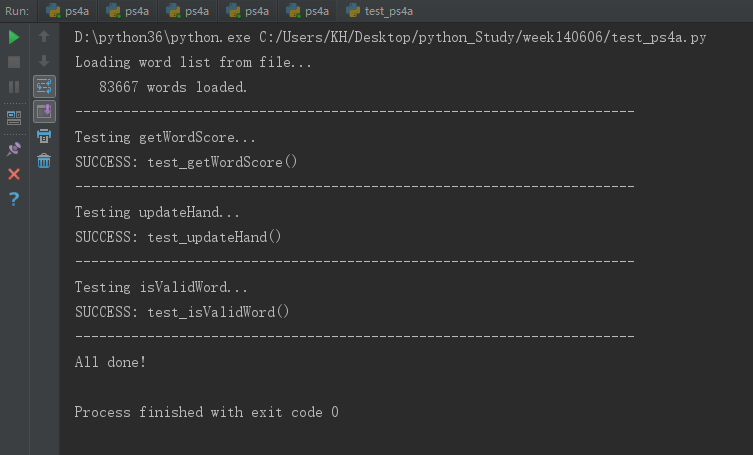